<a href="https://colab.research.google.com/github/jscienciadados/redes-neurais/blob/main/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import keras 
from keras.datasets import mnist 
from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neura 
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting) from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

In [5]:
# Carreagar os dados de treino e de teste
(x_treino, y_treino), (x_teste, y_teste)= mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [6]:
# Analisando o dataset
print("Quantidade de imagens para treino",len(x_treino))

Quantidade de imagens para treino 60000


In [7]:
print("Quantidade de imagens de teste", len(y_teste))

Quantidade de imagens de teste 10000


In [8]:
print("Tipo de Dados de treino", type(x_treino))
print("Tipo de dados de teste", type(y_teste))

Tipo de Dados de treino <class 'numpy.ndarray'>
Tipo de dados de teste <class 'numpy.ndarray'>


In [10]:
representacao_imagem = y_treino[0]
print(representacao_imagem)
primeira_imagem = x_treino[0]
print(primeira_imagem)
print(primeira_imagem.shape)

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

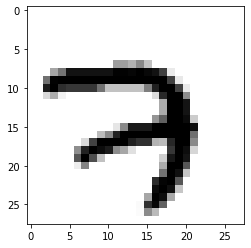

In [16]:
import matplotlib.pyplot as plt
indice = 5000
plt.imshow(x_treino[indice], cmap=plt.cm.binary)

In [17]:
# fluxo para construção de rede neural
# Organizar a camada de input
# Organizar a camada de output
# Estruturar a rede neural
# Treinar o modelo
# Fazer as previsoes

In [21]:
# Achatando a matrix de pixel e transformando em uma lista
quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_imagem = x_treino[0].shape
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1]

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [22]:
print("Quantidade de itens em x_treino_acahatado[0]:" , len(x_treino))

print(x_treino[0])

Quantidade de itens em x_treino_acahatado[0]: 60000
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253

In [23]:
# Normalização dos dados
# 255 vire 1
# 127 vire 0.5
# 0 vire 0


In [26]:
x_treino = x_treino.astype('float32')
x_treino /= 255 
x_teste = x_teste.astype('float32')
x_teste /= 255

In [29]:
print(x_treino[0][350],type(x_treino[0][0]))


0.27450982 <class 'numpy.float32'>


In [34]:
# Preparação da camada de saida - output
valores_unicos = set(y_treino) # {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
print(valores_unicos)

quantidade_valores_unicos = len(valores_unicos) # 10
print(quantidade_valores_unicos)

print("y_treino[0] antes:", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [37]:
# Rede Neural
model = Sequential()

# Primeira hidden layer 30 neuronio
model.add(Dense(30, activation='relu', input_shape=(resolucao_total, )))

model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# Resumo
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [39]:
from tensorflow.compat.v1.keras.optimizers import RMSprop

In [40]:
# Compila e treina o modelo
# Precisamos informar qual será:
# Função de erro
# Algoritmo de backpropagation
# Dados para Treino (imagens normalizadas e labels categorizadas)
# Dados para Teste (imagens normalizadas e labels categorizadas)
# Quantidade de épocas que queremos rodar (sendo 1 época equivalente a analisar TODAS as imagens de treino)
# Tamanho de cada 'batch'
#   -> Supondo que temos 100 imagens
#   -> 100 imagens pode ser muito pesado para processar de uma única vez
#   -> Portanto, quebramos em 'batches' de 10 imagens, cada, e processamos 10 imagens por vez
#   -> Geralmente, o tamanho dos batches deve ser potência de 2 (2, 4, 8, 16, 32, 64, 128, ...), para melhorar performance

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Treina o modelo

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 4s 4ms/step - loss: 1.2295 - accuracy: 0.6014 - val_loss: 0.3243 - val_accuracy: 0.9104
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5186 - accuracy: 0.8442 - val_loss: 0.2586 - val_accuracy: 0.9242
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4124 - accuracy: 0.8781 - val_loss: 0.2239 - val_accuracy: 0.9354
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3667 - accuracy: 0.8918 - val_loss: 0.2097 - val_accuracy: 0.9412
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3319 - accuracy: 0.9037 - val_loss: 0.1984 - val_accuracy: 0.9435
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3169 - accuracy: 0.9082 - val_loss: 0.1868 - val_accuracy: 0.9467
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3056 - accuracy: 0.9115 - val_loss: 0.1882 - val_accuracy: 0.9479
Epoch 

Previsão:  [[1.9217860e-06 2.6259751e-03 3.3530339e-03 9.7411919e-01 1.6524236e-05
  1.5662052e-02 1.0824349e-07 3.9431211e-04 1.4891234e-03 2.3377009e-03]]
Previsão ajustada:  [3]


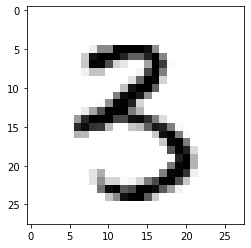

In [44]:
# Fazendo as Previsoes
imagem = x_teste[indice].reshape((1, resolucao_total))
prediction = model.predict(imagem)
print("Previsão: ", prediction)

#Transformar a previsao em algo que conseguimos entender de forma mais facil
import numpy as np
prediction_class = np.argmax(prediction, axis=-1)
print("Previsão ajustada: ", prediction_class)

# Recarregamos o MNIST e exibimos a imagem original usando o matplotlib carregado anteriormente
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)